# E3. 고양이 수염 스티커 만들기

## Step 1. 스티커 구하기 or 만들기
- [고양이 수염](https://www.flaticon.com/free-icon/cat-whiskers_24674?term=cat%20nose&page=1&position=1)

## Step 2. 얼굴 검출 & 랜드마크 검출하기

In [23]:
# 필요 라이브러리 import
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

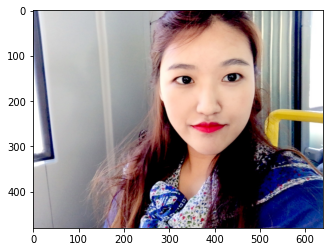

In [25]:
my_image_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/jiyoon.png'

# OpenCV로 이미지 읽어오기
img_bgr = cv2.imread(my_image_path)
# 640 * 480 크기로 리사이즈
img_bgr = cv2.resize(img_bgr, (640, 480))
img_show = img_bgr.copy()
# BGR -> RGB
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
# 출력용 이미지 별도 보관
plt.imshow(img_rgb)
plt.show()

In [26]:
# HOG(Histogram of Oriented Gradients) - 이미지에서 얼굴 찾기
import dlib
# detector 선언
detector_hog = dlib.get_frontal_face_detector()
print("🌫🛸")

🌫🛸


In [27]:
# detector 이용해 얼굴의 bounding box 추출
#(image, number of image pyramid)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)
print("🌫🛸")

🌫🛸


rectangles[[(266, 93) (489, 316)]]


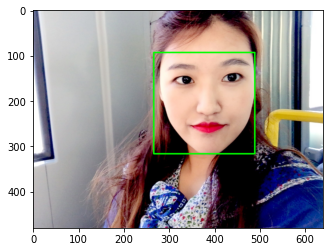

In [28]:
# 찾은 얼굴을 화면에 출력

# 찾은 얼굴영역 좌표
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l, t), (r, b), (0, 255, 0), 2, lineType = cv2.LINE_AA)
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### Dlib landmark localization
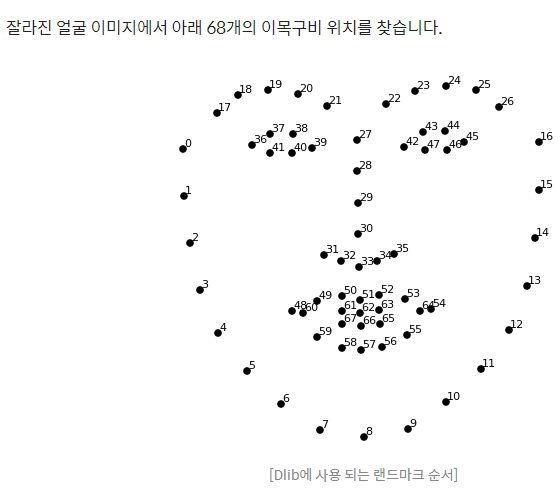

In [29]:
# 저장한 landmark 모델 불러오기
model_path = os.getenv('HOME') + '/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [30]:
list_landmarks = []
for dlib_rect in dlib_rects:
    # landmark_predictor는 RGB 이미지와 dlib.rectangle을 입력 받아 dlib.full_object detection 반환
    points = landmark_predictor(img_rgb, dlib_rect)
    # points는 dlib.full_object_detection의 객ㅊ
    # parts() 함수로 개별 위치에 접근
    # 직관적인 (x,y) 형태로 접근할 수 있도록 변환
    # list_landmark에 68개의 랜드마크가 얼굴 개수만큼 저장됨
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
print(len(list_landmarks[0]))

68


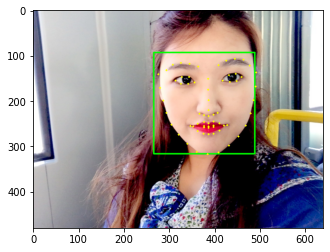

In [31]:
# 랜드마크 출력
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## Step 3. 스티커 적용 위치 확인하기
![image-2.png](attachment:image-2.png)
- 고양이 수염이 적용될 볼 위치를 lank 사용해서 계산
 2, 36, 48, 30번 인덱스 사용

In [32]:
# 좌표 확인
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    # 코 끝 지점 index: 
    print(landmark[30]) 
    x = landmark[30][0]
    y = landmark[30][1] 
    w = dlib_rect.width()
    h = dlib_rect.width()
    print('(x,y):(%d,%d)'%(x,y))
    print('(w,h):(%d,%d)'%(w,h))

(387, 220)
(x,y):(387,220)
(w,h):(224,224)


## Step 4. 스티커 적용하기

(224, 224, 3)


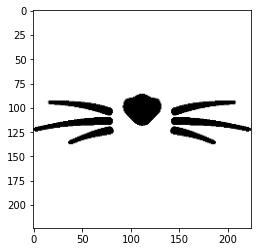

In [33]:
# 고양이 수염 스티커 리사이즈
sticker_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

print(img_sticker.shape)
plt.imshow(img_sticker)

### 가중치 합, 평균 연산 - cv2.addWeighted
- [참고]: https://deep-learning-study.tistory.com/115
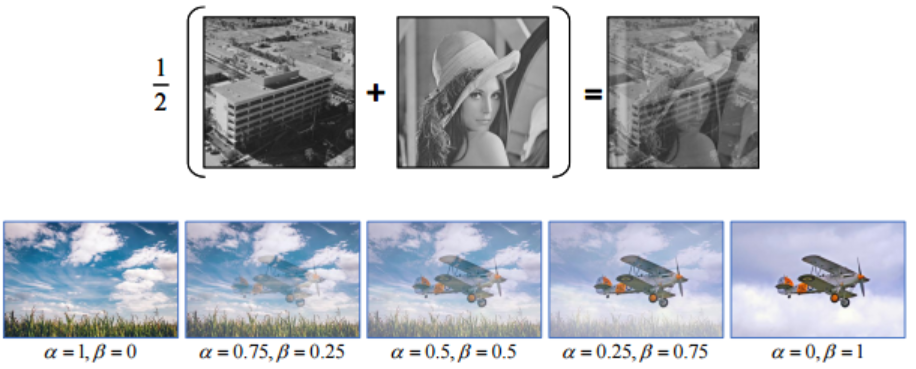


```python

cv2.addWeighted(src1, alpha, src2, beta, gamma, dst = None, dtype = None)

```
- src1: (입력) 첫 번째 영상
- alpha: 첫 번째 영상 가중치
- src2: 2번째 영상. src1와 같은 크기 & 같은 타입
- beta: 두 번째 영상 가중치
- gamma: 결과 영상에 추가적으로 더할 값
- dst: 가중치 합 결과 영상
- dtype: 출력 영상(dst)의 타입


nose x y: 387 220
left-top: 275 108
sticker size: 275 108


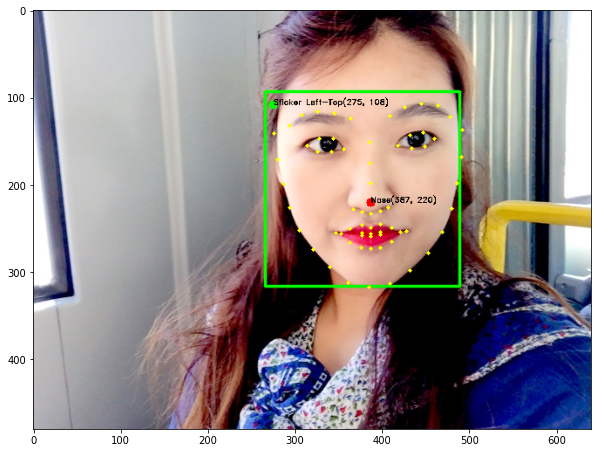

In [34]:
# 원본 이미지에 스티커 이미지 추가하기 위해 x,y 좌표 조정
# 이미지 시작점은 top_left 좌표이기 때문
# left
refined_x = x - (w//2)
# top
refined_y = y - (h//2)
# print('(x,y):(%d,%d)'%(refined_x, refined_y))

print('nose x y:', x, y)
print('left-top:', refined_x, refined_y)
print('sticker size:', refined_x, refined_y)

marked_image = img_show_rgb.copy()
cv2.circle(marked_image, (x, y), 5, (255, 0, 0), -1)
cv2.circle(marked_image, (refined_x, refined_y), 5, (0, 255, 0), -1)
cv2.putText(marked_image, f'Nose{(x, y)}', (x, y), fontScale = 0.3, color = (0,0,0),
            fontFace = cv2.FONT_HERSHEY_DUPLEX)
cv2.putText(marked_image, f'Sticker Left-Top{(refined_x, refined_y)}', (refined_x, refined_y), fontScale = 0.3, color = (0,0,0), fontFace = cv2.FONT_HERSHEY_DUPLEX)

plt.figure(figsize = (10, 10))
plt.imshow(marked_image)
plt.show()

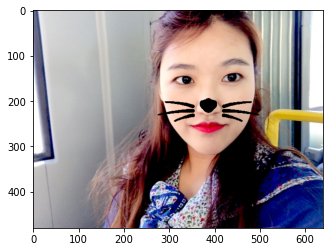

In [36]:
# 해당 좌표에 스티커 붙이기2
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## Step 5. 문제점 찾아보기
- 얼굴 각도에 따라 스티커가 어떻게 변해야하는가
- 멀리서 촬영, 혹은 옆으로 누워서 촬영하면 안되는 경우
- 실행 속도가 중요한지
- 스티커앱을 만들 때 정확도가 얼마나 중요한지

### 얼굴 각도에 따른 스티커의 변화
- 방탄소년단 진의 측면 얼굴이 인식되는지 여부 확인

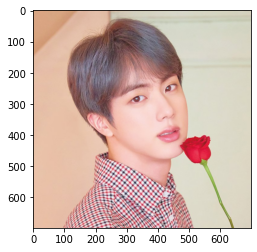

In [13]:
jin_image_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/Jin.png'
jin_bgr = cv2.imread(jin_image_path)
jin_show = jin_bgr.copy()
jin_rgb = cv2.cvtColor(jin_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(jin_rgb)
plt.show()

#### cv2.rectangle(img, start, end, color, thickness)
- [참고](https://opencv-python.readthedocs.io/en/latest/doc/03.drawShape/drawShape.html)
- img: 그림을 그릴 이미지
- start: 시작 좌표(x1,y1)
- end: 종료 좌표(x2, y2)
- color: BGR 형태의 Color(예 (255, 0, 0) -> Blue)
- thickness(int): 선의 두께. pixel
```python
img = cv2.rectangle(img, (384, 0), (510, 128), (0, 255, 0), 3)
```

#### cv2.circle(img, center, radian, color, thickness)
- img: 그림을 그릴 이미지
- center: 원의 중심 좌표(x, y)
- radian: 반지름
- color: BGR 형태의 Color
- thickness: 선의 두께, -1이면 원 안쪽을 채움

rectangles[[(260, 171) (527, 439)]]


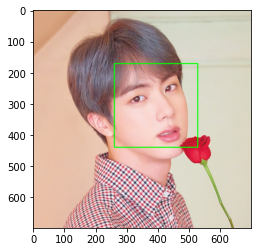

In [14]:
# detector hog 선언
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(jin_rgb, 1)

# 찾은 얼굴영역 좌표
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(jin_show, (l, t), (r, b), (0, 255, 0), 2, lineType = cv2.LINE_AA)

jin_show_rgb = cv2.cvtColor(jin_show, cv2.COLOR_BGR2RGB)
plt.imshow(jin_show_rgb)
plt.show()

In [15]:
# 전이학습된 모델 가져오기
model_path = os.getenv('HOME') + '/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [16]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(jin_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(jin_show, point, 2, (0, 255, 255), -1)
        
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    print('(x,y):(%d,%d)'%(x,y))
    print('(w,h):(%d,%d)'%(w,h))

(x,y):(439,324)
(w,h):(268,268)


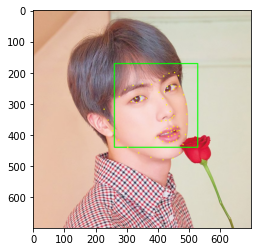

In [17]:
# 랜드마크 출력
jin_img = jin_show.copy()
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(jin_show, point, 2, (0, 255, 255), -1)
jin_img = cv2.cvtColor(jin_show, cv2.COLOR_BGR2RGB)
plt.imshow(jin_img)
plt.show()

(268, 268, 3)


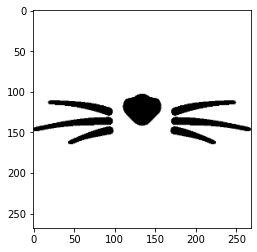

In [18]:
# 고양이 수염 가져오기 및 리사이즈
sticier_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))
img_sticker_rgb = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)

print(img_sticker_rgb.shape)
plt.imshow(img_sticker_rgb)

nose x y: 439 324
left-top: 305 190
sticker size: 305 190


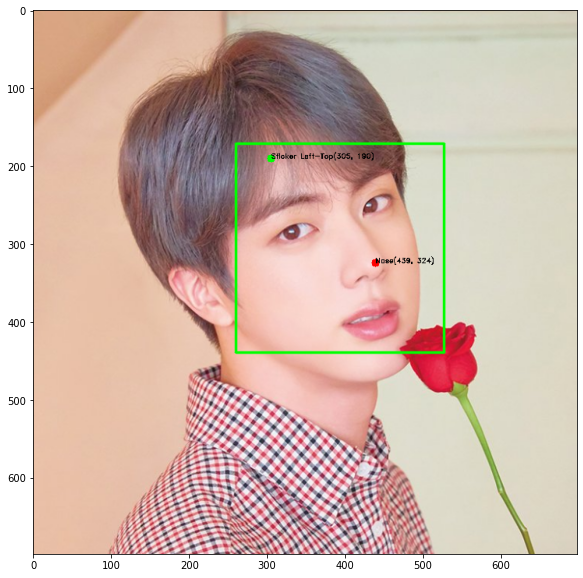

In [19]:
# 원본 이미지에 스티커 이미지 추가하기 위해 x,y 좌표 조정
# 이미지 시작점은 top_left 좌표이기 때문
# left
refined_x = x - (w//2)
# top
refined_y = y - (h//2)
# print('(x,y):(%d,%d)'%(refined_x, refined_y))

print('nose x y:', x, y)
print('left-top:', refined_x, refined_y)
print('sticker size:', refined_x, refined_y)

jin_marked_image = jin_show_rgb.copy()
cv2.circle(jin_marked_image, (x, y), 5, (255, 0, 0), -1)
cv2.circle(jin_marked_image, (refined_x, refined_y), 5, (0, 255, 0), -1)
cv2.putText(jin_marked_image, f'Nose{(x, y)}', (x, y), fontScale = 0.3, color = (0,0,0),
            fontFace = cv2.FONT_HERSHEY_DUPLEX)
cv2.putText(jin_marked_image, f'Sticker Left-Top{(refined_x, refined_y)}', (refined_x, refined_y), fontScale = 0.3, color = (0,0,0), fontFace = cv2.FONT_HERSHEY_DUPLEX)

plt.figure(figsize = (10, 10))
plt.imshow(jin_marked_image)
plt.show()

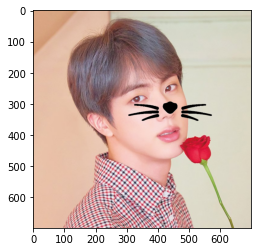

In [20]:
# 정해진 좌표에 수염 붙이기
jin_sticker = jin_show.copy()
sticker_area = jin_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
jin_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area, img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(jin_bgr, cv2.COLOR_BGR2RGB))
plt.show()

#### 중간 점검
- 정면이 아닌 상태에서도 landmark까지는 잘 출력됨
- 하지만, 고양이 수염 스티커의 경우 회전된 얼굴의 각도에 맞게 위치 및 각도에 조절이 필요

In [23]:
cat_list1 = [(int(w*0.46), int(w*0.4)),
             (int(w*0.54), int(w*0.4)),
             (int(w*0.4), int(w*0.57)),
             (int(w*0.6), int(w*0.57))]

In [24]:
cat_list2 = [((landmark[31][0]+landmark[27][0])//2 - l, (landmark[31][1]+landmark[27][1])//2 - t),
             ((landmark[35][0]+landmark[27][0])//2 - l, (landmark[35][1]+landmark[27][1])//2 - t),
             (landmark[31][0] - l, landmark[31][1] - t),
             (landmark[35][0] - l, landmark[35][1] - t)]

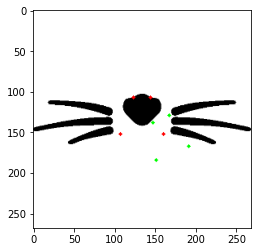

In [25]:
sticker_copy = img_sticker.copy()
for point in cat_list1:
    cv2.circle(sticker_copy, point, 2, (255, 0, 0), -1)
for point in cat_list2:
    cv2.circle(sticker_copy, point, 2, (0, 255, 0), -1)

plt.imshow(sticker_copy)
plt.show()

In [26]:
img_sticker.shape

(268, 268, 3)

### 멀리서 촬영했을 때의 얼굴/스티커 인식
- 연예인 차은우의 사진 활용해 원거리에서의 얼굴 인식 여부 확인

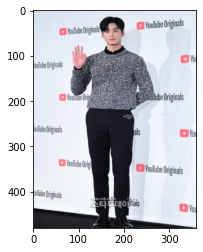

In [2]:
Cha_image_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/Cha.png'

# OpenCV로 이미지 읽어오기
Cha_bgr = cv2.imread(Cha_image_path)
# 640 * 480 크기로 리사이즈
Cha_bgr = cv2.resize(Cha_bgr, (360, 480))
Cha_show = Cha_bgr.copy()
# BGR -> RGB
Cha_rgb = cv2.cvtColor(Cha_bgr, cv2.COLOR_BGR2RGB)
# 출력용 이미지 별도 보관
plt.imshow(Cha_rgb)
plt.show()

In [3]:
# HOG(Histogram of Oriented Gradients) - 이미지에서 얼굴 찾기
import dlib
# detector 선언
detector_hog = dlib.get_frontal_face_detector()
print("🌫🛸")

🌫🛸


In [4]:
# detector 이용해 얼굴의 bounding box 추출
#(image, number of image pyramid)
Cha_img_rgb = cv2.cvtColor(Cha_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(Cha_rgb, 1)
print("🌫🛸")

🌫🛸


rectangles[[(151, 31) (194, 74)]]


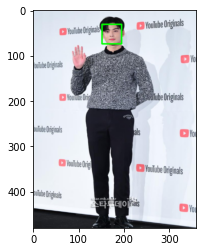

In [5]:
# 찾은 얼굴을 화면에 출력

# 찾은 얼굴영역 좌표
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(Cha_show, (l, t), (r, b), (0, 255, 0), 2, lineType = cv2.LINE_AA)
    
Cha_show_rgb = cv2.cvtColor(Cha_show, cv2.COLOR_BGR2RGB)
plt.imshow(Cha_show_rgb)
plt.show()

In [6]:
# 저장한 landmark 모델 불러오기
model_path = os.getenv('HOME') + '/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [7]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(Cha_show_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(Cha_show_rgb, point, 2, (0, 255, 255), -1)
        
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    print('(x,y):(%d,%d)'%(x,y))
    print('(w,h):(%d,%d)'%(w,h))

(x,y):(171,55)
(w,h):(44,44)


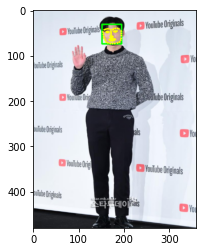

In [8]:
# 랜드마크 출력
Cha_show_rgb = Cha_show.copy()

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(Cha_show, point, 2, (0, 255, 255), -1)
Cha_show_rgb = cv2.cvtColor(Cha_show, cv2.COLOR_BGR2RGB)
plt.imshow(Cha_show_rgb)
plt.show()

In [9]:
# 좌표 확인
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    # 코 끝 지점 index: 
    print(landmark[30]) 
    x = landmark[30][0]
    y = landmark[30][1] 
    w = dlib_rect.width()
    h = dlib_rect.width()
    print('(x,y):(%d,%d)'%(x,y))
    print('(w,h):(%d,%d)'%(w,h))

(171, 55)
(x,y):(171,55)
(w,h):(44,44)


(44, 44, 3)


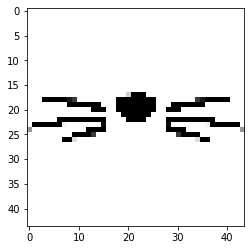

In [10]:
# 스티커 적용하기
# 고양이 수염 스티커 리사이즈
sticker_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
cha_img_sticker = img_sticker.copy()
cha_img_sticker = cv2.resize(cha_img_sticker, (w,h))

print(cha_img_sticker.shape)
plt.imshow(cha_img_sticker)

nose x y: 171 55
left-top: 149 33
sticker size: 149 33


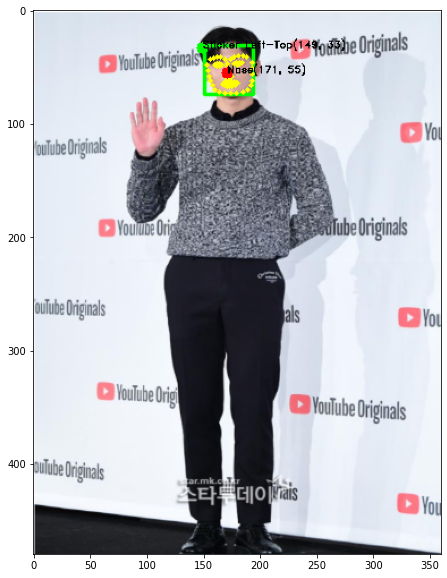

In [11]:
# 원본 이미지에 스티커 이미지 추가하기 위해 x,y 좌표 조정
# 이미지 시작점은 top_left 좌표이기 때문
# left
refined_x = x - (w//2)
# top
refined_y = y - (h//2)
# print('(x,y):(%d,%d)'%(refined_x, refined_y))

print('nose x y:', x, y)
print('left-top:', refined_x, refined_y)
print('sticker size:', refined_x, refined_y)

Cha_marked_image = Cha_show_rgb.copy()
cv2.circle(Cha_marked_image, (x, y), 5, (255, 0, 0), -1)
cv2.circle(Cha_marked_image, (refined_x, refined_y), 5, (0, 255, 0), -1)
cv2.putText(Cha_marked_image, f'Nose{(x, y)}', (x, y), fontScale = 0.3, color = (0,0,0),
            fontFace = cv2.FONT_HERSHEY_DUPLEX)
cv2.putText(Cha_marked_image, f'Sticker Left-Top{(refined_x, refined_y)}', (refined_x, refined_y), fontScale = 0.3, color = (0,0,0), fontFace = cv2.FONT_HERSHEY_DUPLEX)

plt.figure(figsize = (10, 10))
plt.imshow(Cha_marked_image)
plt.show()

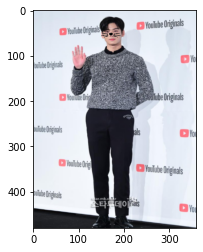

In [12]:
# 수정 코드
sticker_area = Cha_bgr[refined_y:refined_y+cha_img_sticker.shape[0], refined_x:refined_x+cha_img_sticker.shape[1]]
Cha_bgr[refined_y:refined_y+cha_img_sticker.shape[0], refined_x:refined_x+cha_img_sticker.shape[1]] = \
    np.where(cha_img_sticker==255,sticker_area, cha_img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(Cha_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 2명 이상일 때 적용

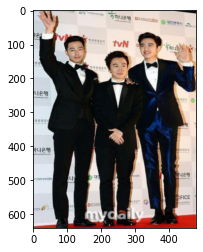

In [59]:
my_image_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/Lee.png'

# OpenCV로 이미지 읽어오기
img_bgr = cv2.imread(my_image_path)
# 640 * 480 크기로 리사이즈
img_bgr = cv2.resize(img_bgr, (480, 640))
img_show = img_bgr.copy()
# BGR -> RGB
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
# 출력용 이미지 별도 보관
plt.imshow(img_rgb)
plt.show()

In [60]:
# HOG(Histogram of Oriented Gradients) - 이미지에서 얼굴 찾기
import dlib
# detector 선언
detector_hog = dlib.get_frontal_face_detector()
print("🌫🛸")

🌫🛸


In [61]:
# detector 이용해 얼굴의 bounding box 추출
#(image, number of image pyramid)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)
print("🌫🛸")

🌫🛸


rectangles[[(101, 101) (152, 153)], [(308, 84) (360, 136)], [(227, 147) (279, 199)]]


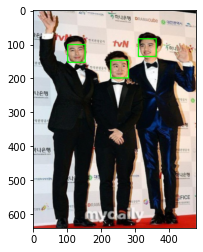

In [62]:
# 찾은 얼굴을 화면에 출력

# 찾은 얼굴영역 좌표
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l, t), (r, b), (0, 255, 0), 2, lineType = cv2.LINE_AA)
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [63]:
# 저장한 landmark 모델 불러오기
model_path = os.getenv('HOME') + '/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [64]:
list_landmarks = []
for dlib_rect in dlib_rects:
    # landmark_predictor는 RGB 이미지와 dlib.rectangle을 입력 받아 dlib.full_object detection 반환
    points = landmark_predictor(img_rgb, dlib_rect)
    # points는 dlib.full_object_detection의 객ㅊ
    # parts() 함수로 개별 위치에 접근
    # 직관적인 (x,y) 형태로 접근할 수 있도록 변환
    # list_landmark에 68개의 랜드마크가 얼굴 개수만큼 저장됨
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
print(len(list_landmarks[0]))

68


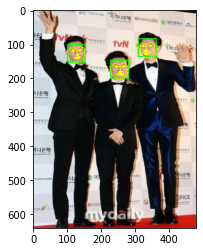

In [65]:
# 랜드마크 출력
for landmark in list_landmarks:
    for i in range(len(list_landmarks)):
        for idx, point in enumerate(list_landmarks[i]):
            cv2.circle(img_show, point, 2, (0, 255, 255), -1)
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [70]:
# 스티커 크기 조정
w = dlib_rect.width()
h = dlib_rect.width()

img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))
print(img_sticker.shape)

(53, 53, 3)


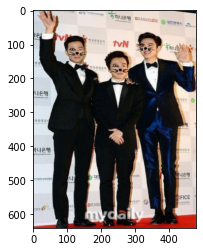

In [71]:
# landmark에서 검출된 얼굴별로 스티커 붙이기
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    # left
    x = landmark[30][0]
    refined_x = int(x - w//2)      
    # top
    y = landmark[30][1]
    refined_y = int(y - w//2)      
    # bounding box, landmark가 없이 스티크 붙이기
    sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 스티커앱 만들 때 정확도의 중요성
- 현재 상용화되고 있는 SNOW, ULIKE, SODA 등의 어플 등은 다양한 필터 및 얼굴 스티커 기능, 얼굴 보정 기능(눈, 코, 입 및 얼굴형 보정), 화장 기능 등을 보유하고 있음
- 이러한 앱에서 가장 중요한 것은 '얼굴 인식'
- 개인별로 더 나아가 국가별, 인종별로 전체적인 얼굴형부터 시작해 각기 다른 형태와 비율의 눈코입을 가지고 있어 다양한 데이터에 대한 학습을 통해 정확도를 높일 수 있음

**총정리**
1. 마지막에 스티커를 붙이는 과정에서 계속 아래와 같은 Value Error 발생
- ValueError: operands could not be broadcast together with shapes (44,44,3) (44,0,3) (44,44,3)
- Why? 리사이즈 된 크기의 스티커 수염을 사용하지 않고, 원본 크기의 스티커 사진을 이용해 shape가 맞지 않다는 error가 지속적으로 속출
- 해결방법? 변수명 알맞게 주기. Error가 발생했을 때 당황하지 말고 변수 하나씩 shape 확인해나가며 어떤 부분에서 Error 발생했는지 찾아나가기

2. 추가적으로 하면 좋을 부분
- 각도에 따라 얼굴 수염을 어떻게 회전하는지(각, 수염 크기 조절등)